In [1]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/Users/moseskayanda/Downloads'

In [7]:
movies = pd.read_table("movie.txt", delimiter= ',')

In [8]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

From above, we can see that the column titles have spacing and special characters which can present a challenge when doing further analysis. Best option would be to rename the columns as below.

In [10]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

checking the head.head() again to confirm this renaming

In [14]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillion   559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


Question to ask do we need the year column to be an interger? It doesnt make sense to have it as an interger. Check below.

In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


fixing the columns. Film and Genre need to be categories.

In [20]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillion   559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [23]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Joint PLots are basically a scatter plot of relationship between two variables(bivariant)**

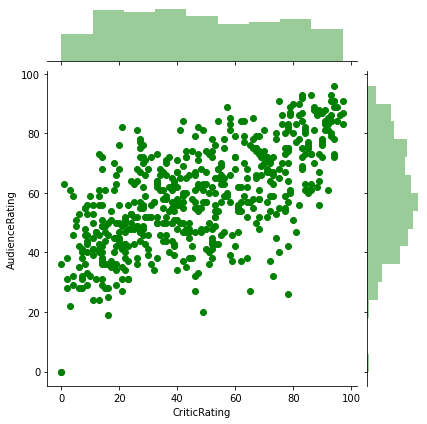

In [28]:
j = sns.jointplot(data= movies, x= 'CriticRating', y = 'AudienceRating', color = 'green')

You can play around with the visualization too. 

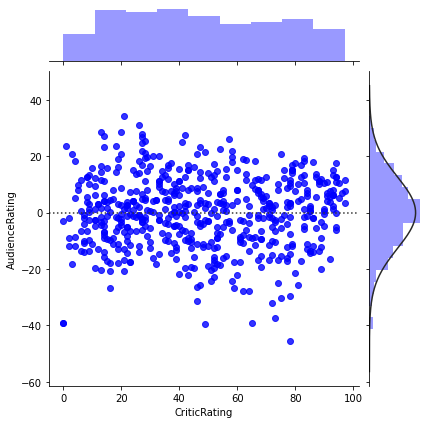

In [32]:
j = sns.jointplot(data= movies, x= 'CriticRating', y = 'AudienceRating', color = 'blue', kind = 'resid')

**Histograms**

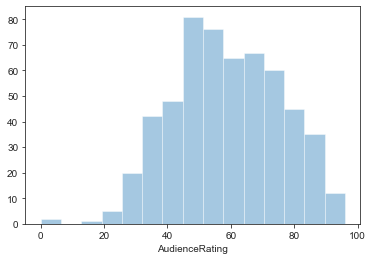

In [44]:
sns.set_style('ticks')
m1 = sns.distplot(movies.AudienceRating, bins=15, kde = False)
#m1 = sns.distplot(movies.AudienceRating, bins=15)

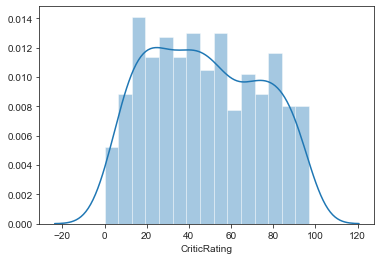

In [41]:
sns.set_style('ticks')
m2 = sns.distplot(movies.CriticRating, bins=15)

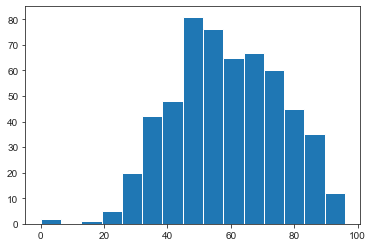

In [40]:
sns.set_style('ticks')
n1 = plt.hist(movies.AudienceRating, bins = 15)

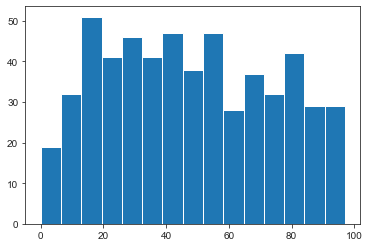

In [39]:
sns.set_style('ticks')
n2 = plt.hist(movies.CriticRating, bins = 15)

**Stacked Histograms**

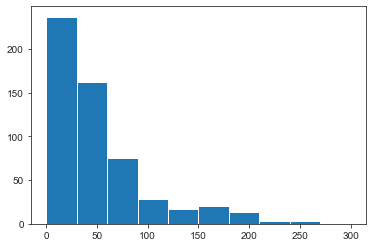

In [46]:
h1 = plt.hist(movies.BudgetMillion)

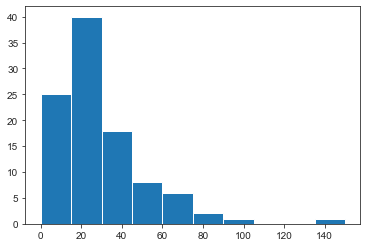

In [50]:
h2 = plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion)

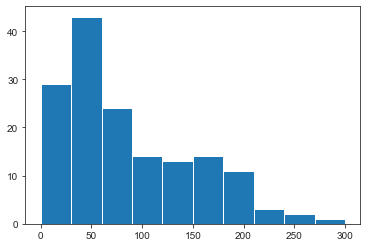

In [51]:
h3 = plt.hist(movies[movies.Genre == 'Action'].BudgetMillion)

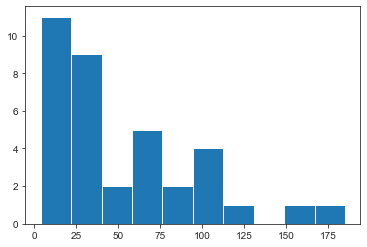

In [52]:
h4 = plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion)

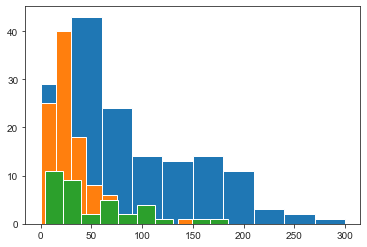

In [54]:
a = plt.hist(movies[movies.Genre == 'Action'].BudgetMillion)
b = plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion)
c = plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion)
plt.show()

The above visualization looks messy. A better way of visualizing the a stacked histogram is as below. 

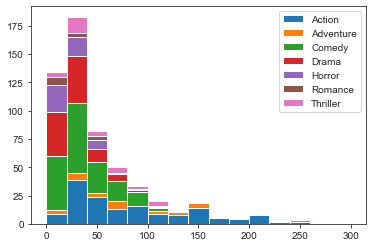

In [67]:
myLabels = list()


lst = list()
for gen in movies.Genre.cat.categories:
    lst.append(movies[movies.Genre == gen].BudgetMillion)
    myLabels.append(gen)

h = plt.hist(lst, bins = 15, stacked=True, rwidth=1, label=myLabels)
plt.legend()

KDE plot

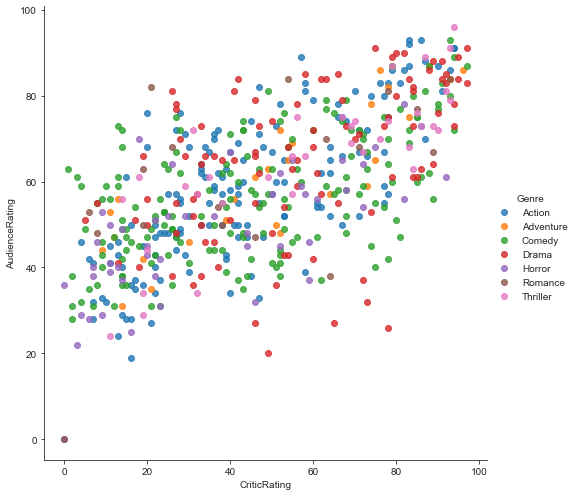

In [70]:
k1 = sns.lmplot(data = movies, x='CriticRating', y = 'AudienceRating', fit_reg=False, hue='Genre', size = 7, aspect=1)

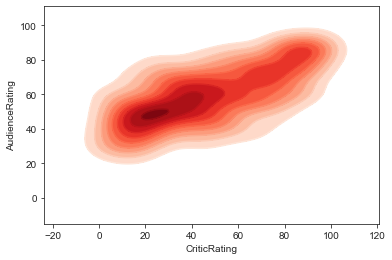

In [86]:
k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest=False, cmap = 'Reds')
#gives contuour to the first plot
k2b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = 'Reds')

**Subplots**

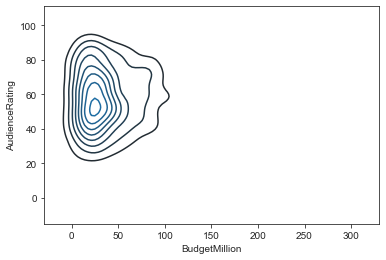

In [88]:
k2 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating,)

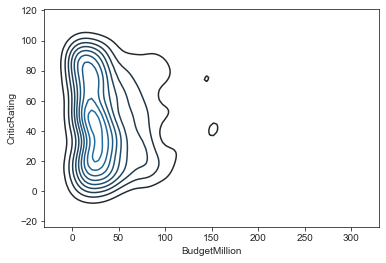

In [89]:
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating,)

[(-20.0, 160.0)]

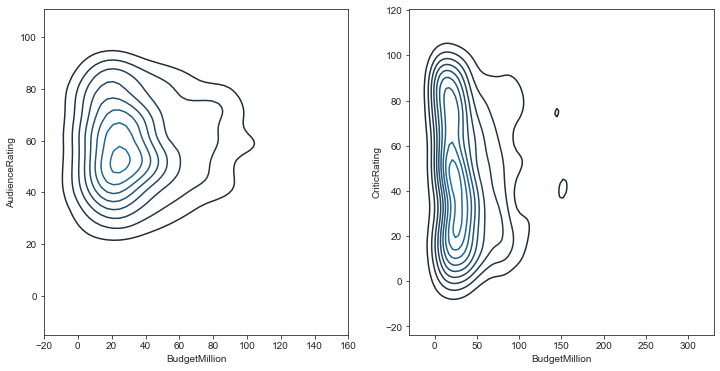

In [97]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey = True)
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating,ax=axes[1])
k1.set(xlim=(-20,160))

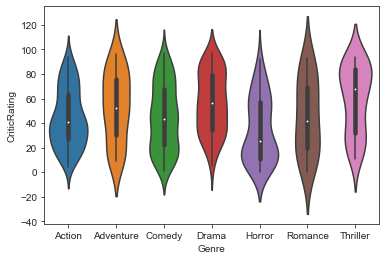

In [99]:
z1 = sns.violinplot(data = movies, x='Genre', y='CriticRating')

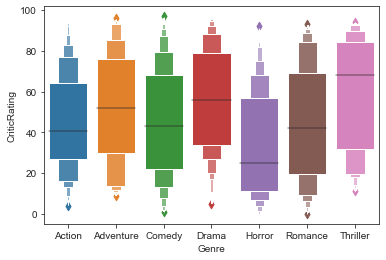

In [100]:
z1 = sns.boxenplot(data = movies, x='Genre', y='CriticRating')

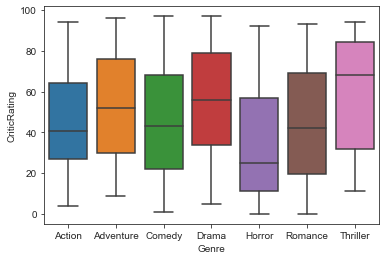

In [101]:
z1 = sns.boxplot(data = movies, x='Genre', y='CriticRating')

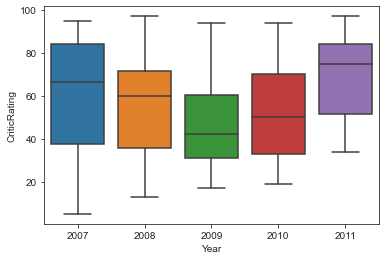

In [102]:
z1 = sns.boxplot(data = movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

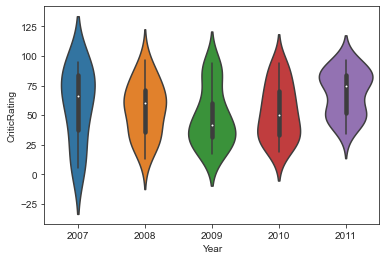

In [103]:
z1 = sns.violinplot(data = movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

**Facet Grids**

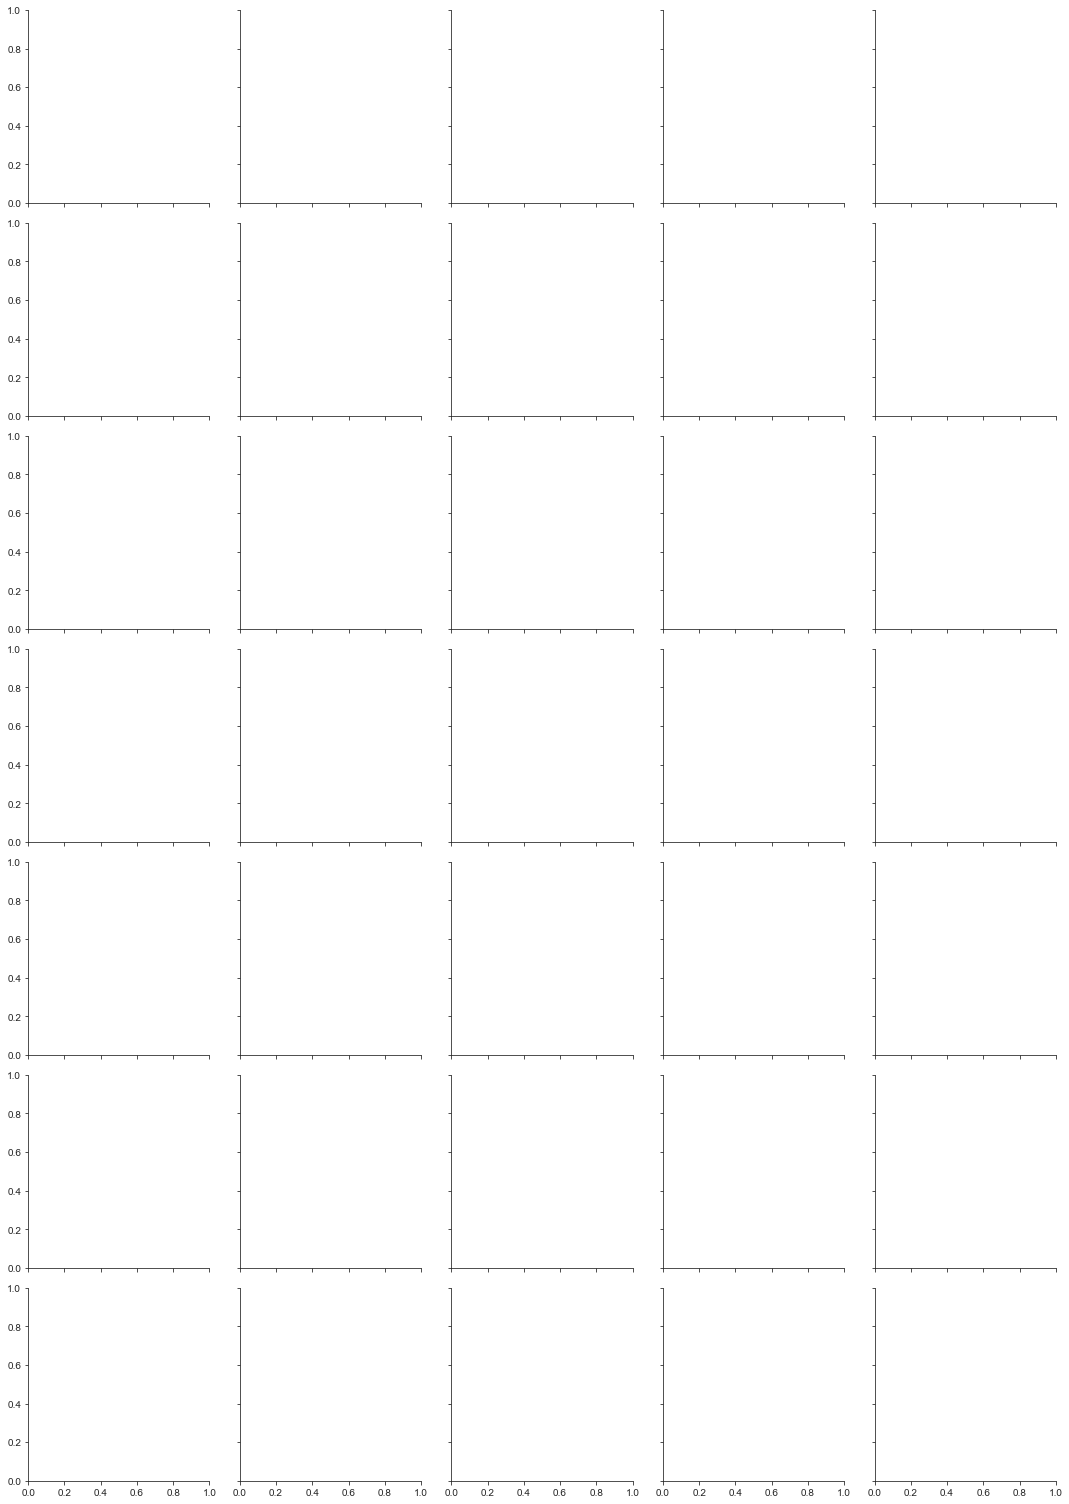

In [109]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

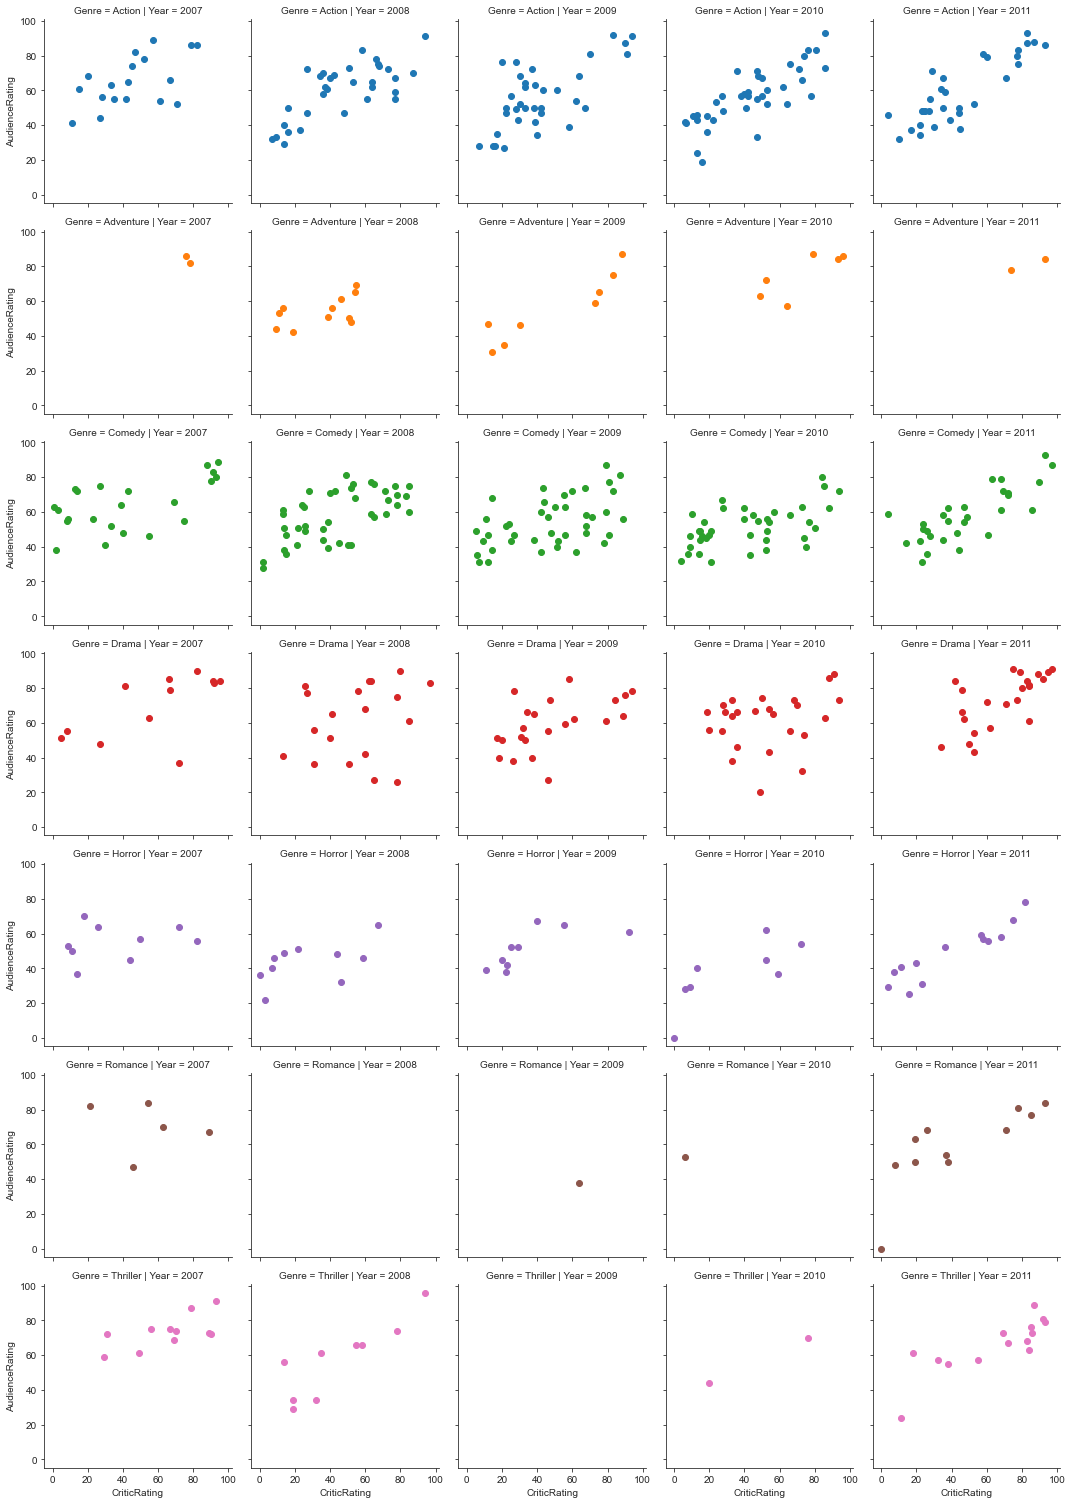

In [110]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', "AudienceRating")

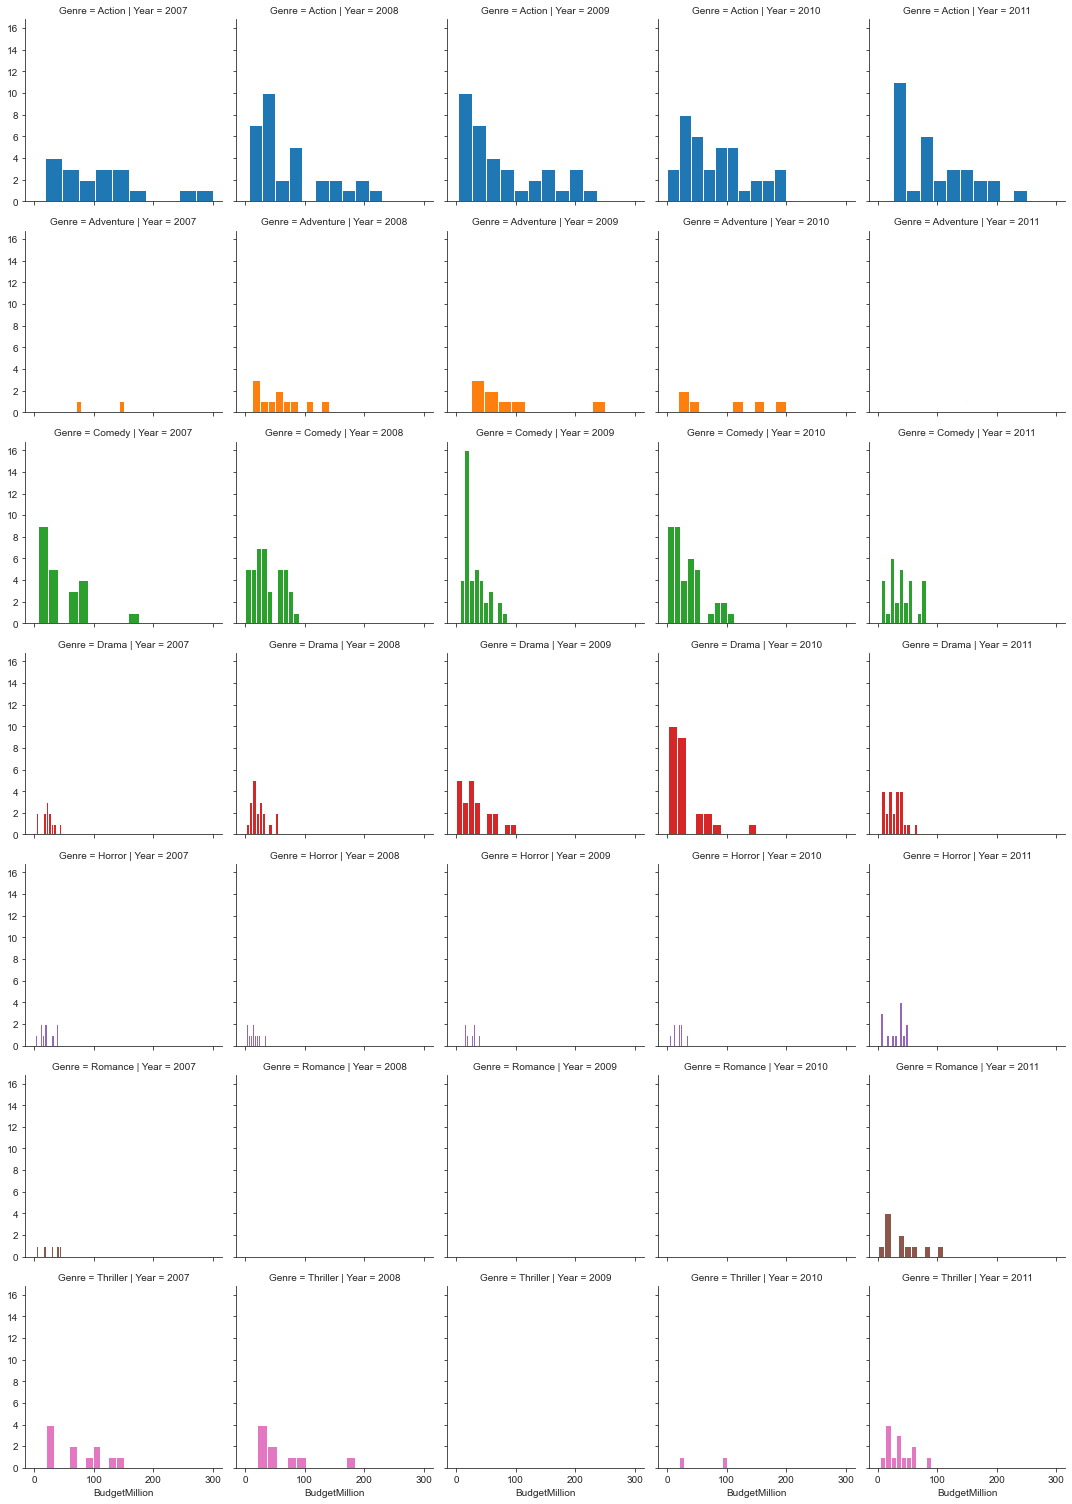

In [113]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillion')

In [ ]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s= 50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', "AudienceRating", **kws)